## Illustrate how the score is helping us predict the binary outcome win/loose

In [1]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

#for backward compatibility
from __future__ import print_function

Scores = [(200,1),(100,0),(150,1),(320,1),(270,1),(134,0),(322,1),(140,0),(210,0),(199,0)]
Labels = ['Score','Win']

df = pd.DataFrame.from_records(Scores, columns=Labels)

glm_binom = sm.GLM(df.Win, df.Score, family=sm.families.Binomial())

res = glm_binom.fit()

print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    Win   No. Observations:                   10
Model:                            GLM   Df Residuals:                        9
Model Family:                Binomial   Df Model:                            0
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -6.6858
Date:                Fri, 10 May 2019   Deviance:                       13.372
Time:                        15:07:28   Pearson chi2:                     9.94
No. Iterations:                     4   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Score          0.0021      0.003      0.688      0.491      -0.004       0.008


#### The value of the score coef tells us to what extent it is able to predict the likelihood of winning a game .

In [21]:
#res.get_prediction(10)
res.predict(10)

array([0.50519157])

In [7]:
 sm.GLM

0    0.602368
1    0.551732
2    0.577253
3    0.660280
4    0.636617
5    0.569124
6    0.661211
7    0.572177
8    0.607331
9    0.601870
dtype: float64

In [8]:
prediction = prediction > 0.5
prediction

0    True
1    True
2    True
3    True
4    True
5    True
6    True
7    True
8    True
9    True
dtype: bool

In [9]:
def accuracy(a,b):
    accu =(a==b)
    accu=accu.mean()
    
    return accu

## how to fit a Logistic Regression using scikit learn 

In [27]:
# Creating the data
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=100, n_features=2,

                           n_informative=2, n_redundant=0,

                           n_clusters_per_class=1,

                           class_sep = 2.0, random_state=101)

The above code creates a sample dataset for a binary classification problem.

2 features are created and the 2 classes are created for the given features


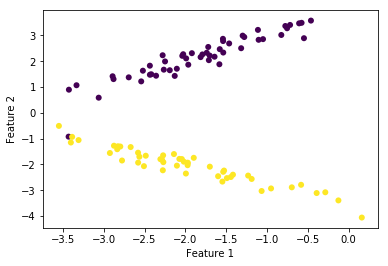

In [28]:
# Plotting the data
%matplotlib inline

import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,

            linewidth=0, edgecolor=None)

plt.xlabel('Feature 1')

plt.ylabel('Feature 2')

plt.show()


In [45]:
# Splitting the Data
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y.astype(float), test_size=0.33, random_state=101)
# In this code we are splitting the training and test sets.

In [32]:
# Logistic Regression Model Fit

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

#initialise logistic regression model and assign to variable clf 
clf = LogisticRegression()

#fit the model with train data(X_train and y_train)
clf.fit(X_train, y_train.astype(int))

#using the model predict the output of test data
y_clf = clf.predict(X_test)

#print the classification report
print(classification_report(y_test, y_clf))

#The code above explains how to fit a logistic regression model and view the classification report.

             precision    recall  f1-score   support

        0.0       1.00      0.93      0.97        15
        1.0       0.95      1.00      0.97        18

avg / total       0.97      0.97      0.97        33



Precision = TP/(TP + FP) > 
Precision is similar to accuracy but looks at only the positively predicted data.

Recall = TP / (TP + FN) >
Recall is also similar to accuracy, it looks at only the relevant data.

f1-score   - The f1-score gives you the harmonic mean of precision and recall

support - The support is the number of samples of the true response that lie in that class.

### ROC Curve

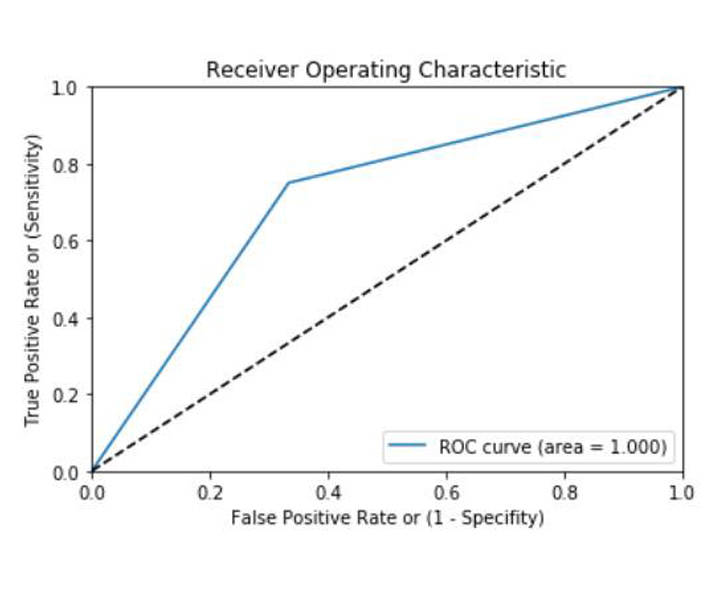

No handles with labels found to put in legend.


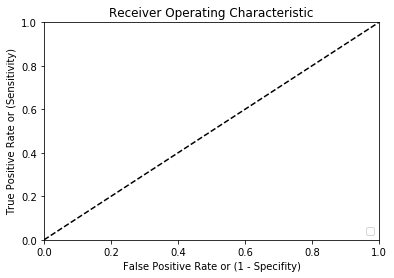

In [36]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Compute fpr, tpr, thresholds and roc auc

fpr, tpr, thresholds = roc_curve(y_test, y_clf)

#roc_auc = auc(y_test, y_clf)

# Plot ROC curve

#plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)

plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve

plt.xlim([0.0, 1.0])

plt.ylim([0.0, 1.0])

plt.xlabel('False Positive Rate or (1 - Specifity)')

plt.ylabel('True Positive Rate or (Sensitivity)')

plt.title('Receiver Operating Characteristic')

plt.legend(loc="lower right")

#### Confusion Matrix

In [38]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_clf)

array([[14,  1],
       [ 0, 18]], dtype=int64)

#Accuracy for this model is (14+18) / (14+1+0+18) = 0.96969

#### Data Prep for Hands On

In [43]:
from sklearn import datasets

iris = datasets.load_iris()

iris_X = iris.data

iris_y = iris.target

#print(iris_X)

#print(iris_y)
